# 现在我们有北上广、深圳、和沈阳5个城市空气质量数据，请绘制出5个城市的PM2.5随时间的变化情况


In [1]:
from matplotlib import pyplot as plt
from matplotlib import rc
import pandas as pd
import numpy as np

In [2]:
file_path = './PM2.5/BeijingPM20100101_20151231.csv'

In [42]:
df = pd.read_csv(file_path)
print(df.head(1))

   No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd   Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW  1.79   

   precipitation  Iprec  
0            0.0    0.0  


In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
No                 52584 non-null int64
year               52584 non-null int64
month              52584 non-null int64
day                52584 non-null int64
hour               52584 non-null int64
season             52584 non-null int64
PM_Dongsi          25052 non-null float64
PM_Dongsihuan      20508 non-null float64
PM_Nongzhanguan    24931 non-null float64
PM_US Post         50387 non-null float64
DEWP               52579 non-null float64
HUMI               52245 non-null float64
PRES               52245 non-null float64
TEMP               52579 non-null float64
cbwd               52579 non-null object
Iws                52579 non-null float64
precipitation      52100 non-null float64
Iprec              52100 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.2+ MB
None


#### 时间都是分开的，如何弄在一起？ 

#### PeriodIndex可以理解为时间段
periods = pd.PeriodIndex(year=data["year"],month=data["month"],day=data["day"],hour=data["hour"],freq="H")


In [44]:
#把分开的时间字符串，通过PeriodIndex方法转换为pandas时间类型
period = pd.PeriodIndex(year = df['year'],month = df['month'],day = df['day'],hour = df['hour'],freq = 'H')
print(period)

PeriodIndex(['2010-01-01 00:00', '2010-01-01 01:00', '2010-01-01 02:00',
             '2010-01-01 03:00', '2010-01-01 04:00', '2010-01-01 05:00',
             '2010-01-01 06:00', '2010-01-01 07:00', '2010-01-01 08:00',
             '2010-01-01 09:00',
             ...
             '2015-12-31 14:00', '2015-12-31 15:00', '2015-12-31 16:00',
             '2015-12-31 17:00', '2015-12-31 18:00', '2015-12-31 19:00',
             '2015-12-31 20:00', '2015-12-31 21:00', '2015-12-31 22:00',
             '2015-12-31 23:00'],
            dtype='period[H]', length=52584, freq='H')


In [45]:
df['datetime'] = period
print(df.head(10))

   No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   
5   6  2010      1    1     5       4        NaN            NaN   
6   7  2010      1    1     6       4        NaN            NaN   
7   8  2010      1    1     7       4        NaN            NaN   
8   9  2010      1    1     8       4        NaN            NaN   
9  10  2010      1    1     9       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  10

In [46]:
#把datetime设置为索引
df.set_index('datetime',inplace=True)


In [47]:
#进行降采样
df_low = df.resample('7D').mean()

In [54]:
#处理缺失数据，删除缺失数据
data = df_low['PM_US Post']
data_cn = df_low['PM_Dongsi']

In [55]:
_x = data.index
_y = data.values

_x_china = data_cn.index
_y_china = data_cn.values

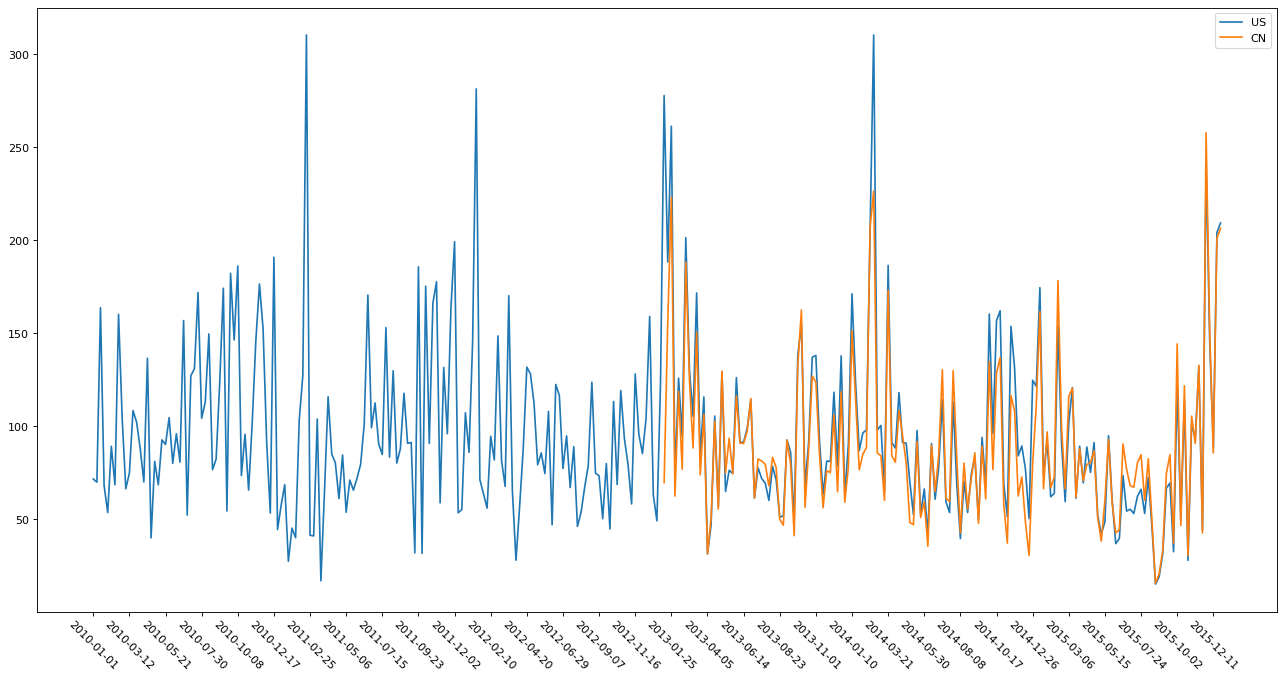

In [56]:
#画图
plt.figure(figsize = (20,10),dpi = 80)

plt.plot(range(len(_x)),_y,label = 'US')
plt.plot(range(len(_x_china)),_y_china,label = 'CN')

plt.xticks(range(0,len(_x),10),list(_x)[::10],rotation = 315)

plt.legend()

plt.show()